In [1]:
#Topic: Pricing and Sales (Kaggle datatable: Housing Prices Dataset)

possible: kaggle.com/datasets/yasserh/housing-prices-dataset
possible: https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction

import warnings

import pandas as pd
from plotnine import *
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
import numpy as np
warnings.filterwarnings("ignore")

In [4]:
#reading dataset
df = pd.read_csv('https://raw.githubusercontent.com/corinne167225/DataAnalysis2/main/Final_Project/Travel.csv')
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [156]:
#changing NaN in age, monthlyincome, and number of followups to be 0 so it won't affect possible future calculations
df['Age'].fillna(0, inplace = True)
df['MonthlyIncome'].fillna(0, inplace = True)
df['NumberOfFollowups'].fillna(0, inplace = True)
df['DurationOfPitch'].fillna(0, inplace = True)
#Count column to help with aggregations
df['Count'] = 1
df


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Count
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,1
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,1
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,1
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,1
4,200004,0,0.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,...,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0,1
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,...,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0,1
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,...,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0,1
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,...,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0,1


In [24]:
#y: ProdTaken
#x: Monthly Income
#z(s): PitchSatisfactionScore, Passport, NumberOfFollowups, Age, DurationOfPitch

In [74]:
#scatter to see relationship b/n ProdTaken and Monthly Income

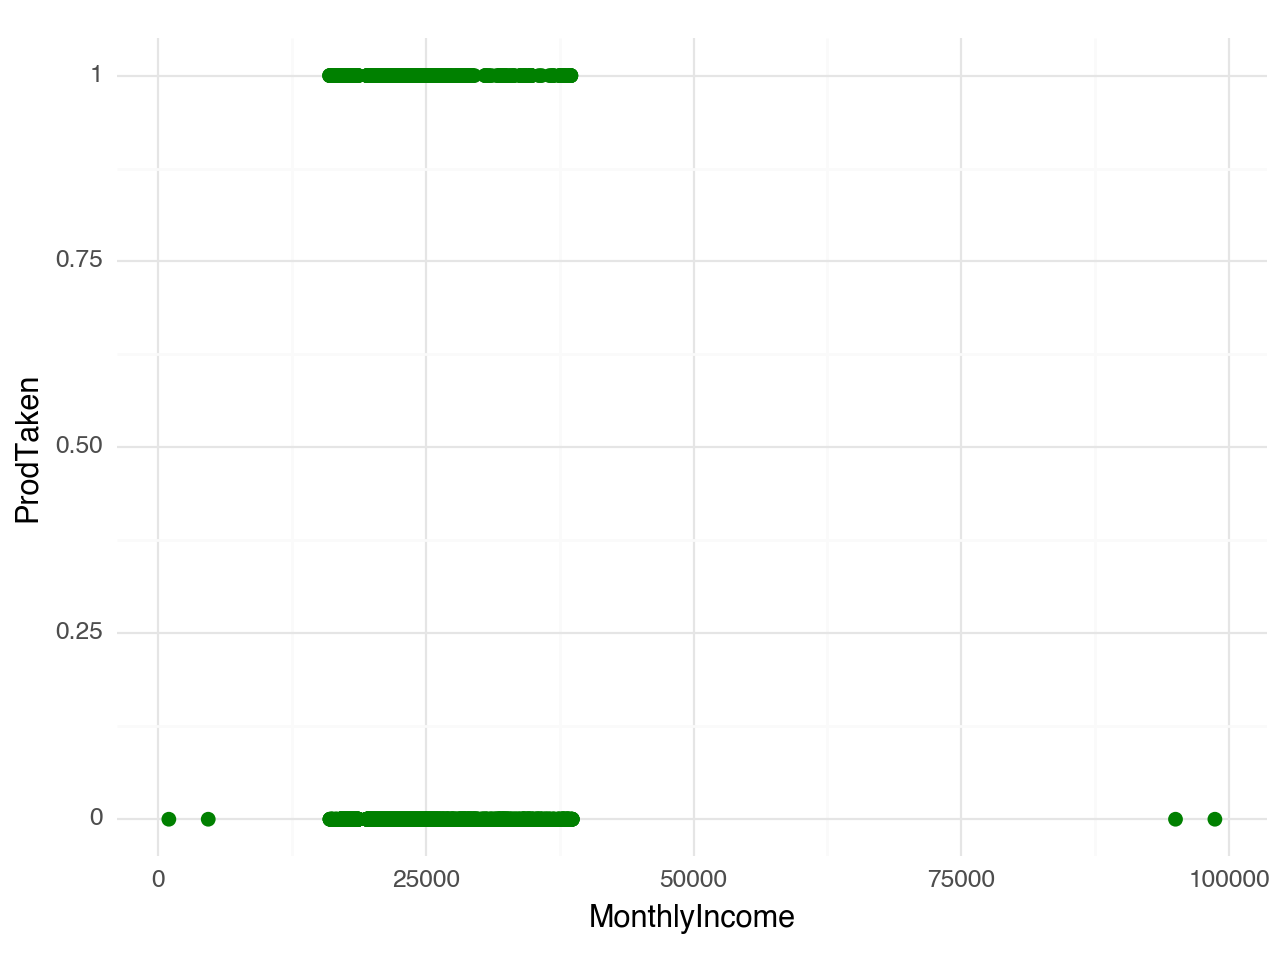

<Figure Size: (640 x 480)>

In [81]:
scatter1 = (ggplot(df, aes(x = 'MonthlyIncome', y = 'ProdTaken')) + geom_point(size = 2, color = 'green')
+ theme_minimal())
scatter1
####ADD LABS/titles

In [33]:
#description of monthly income for those who didn't take package
df.loc[df['ProdTaken'] == 0]['MonthlyIncome'].describe()
#surprised that mean is higher here... +++BUT is it statistically significant???

count     3767.000000
mean     23960.962835
std       5484.359516
min       1000.000000
25%      20674.500000
50%      22729.000000
75%      26069.000000
max      98678.000000
Name: MonthlyIncome, dtype: float64

In [34]:
#description of monthly income for those who did take package
df.loc[df['ProdTaken'] == 1]['MonthlyIncome'].describe()

count      888.000000
mean     22172.827703
std       4648.893747
min      16009.000000
25%      18407.000000
50%      21172.000000
75%      24004.000000
max      38537.000000
Name: MonthlyIncome, dtype: float64

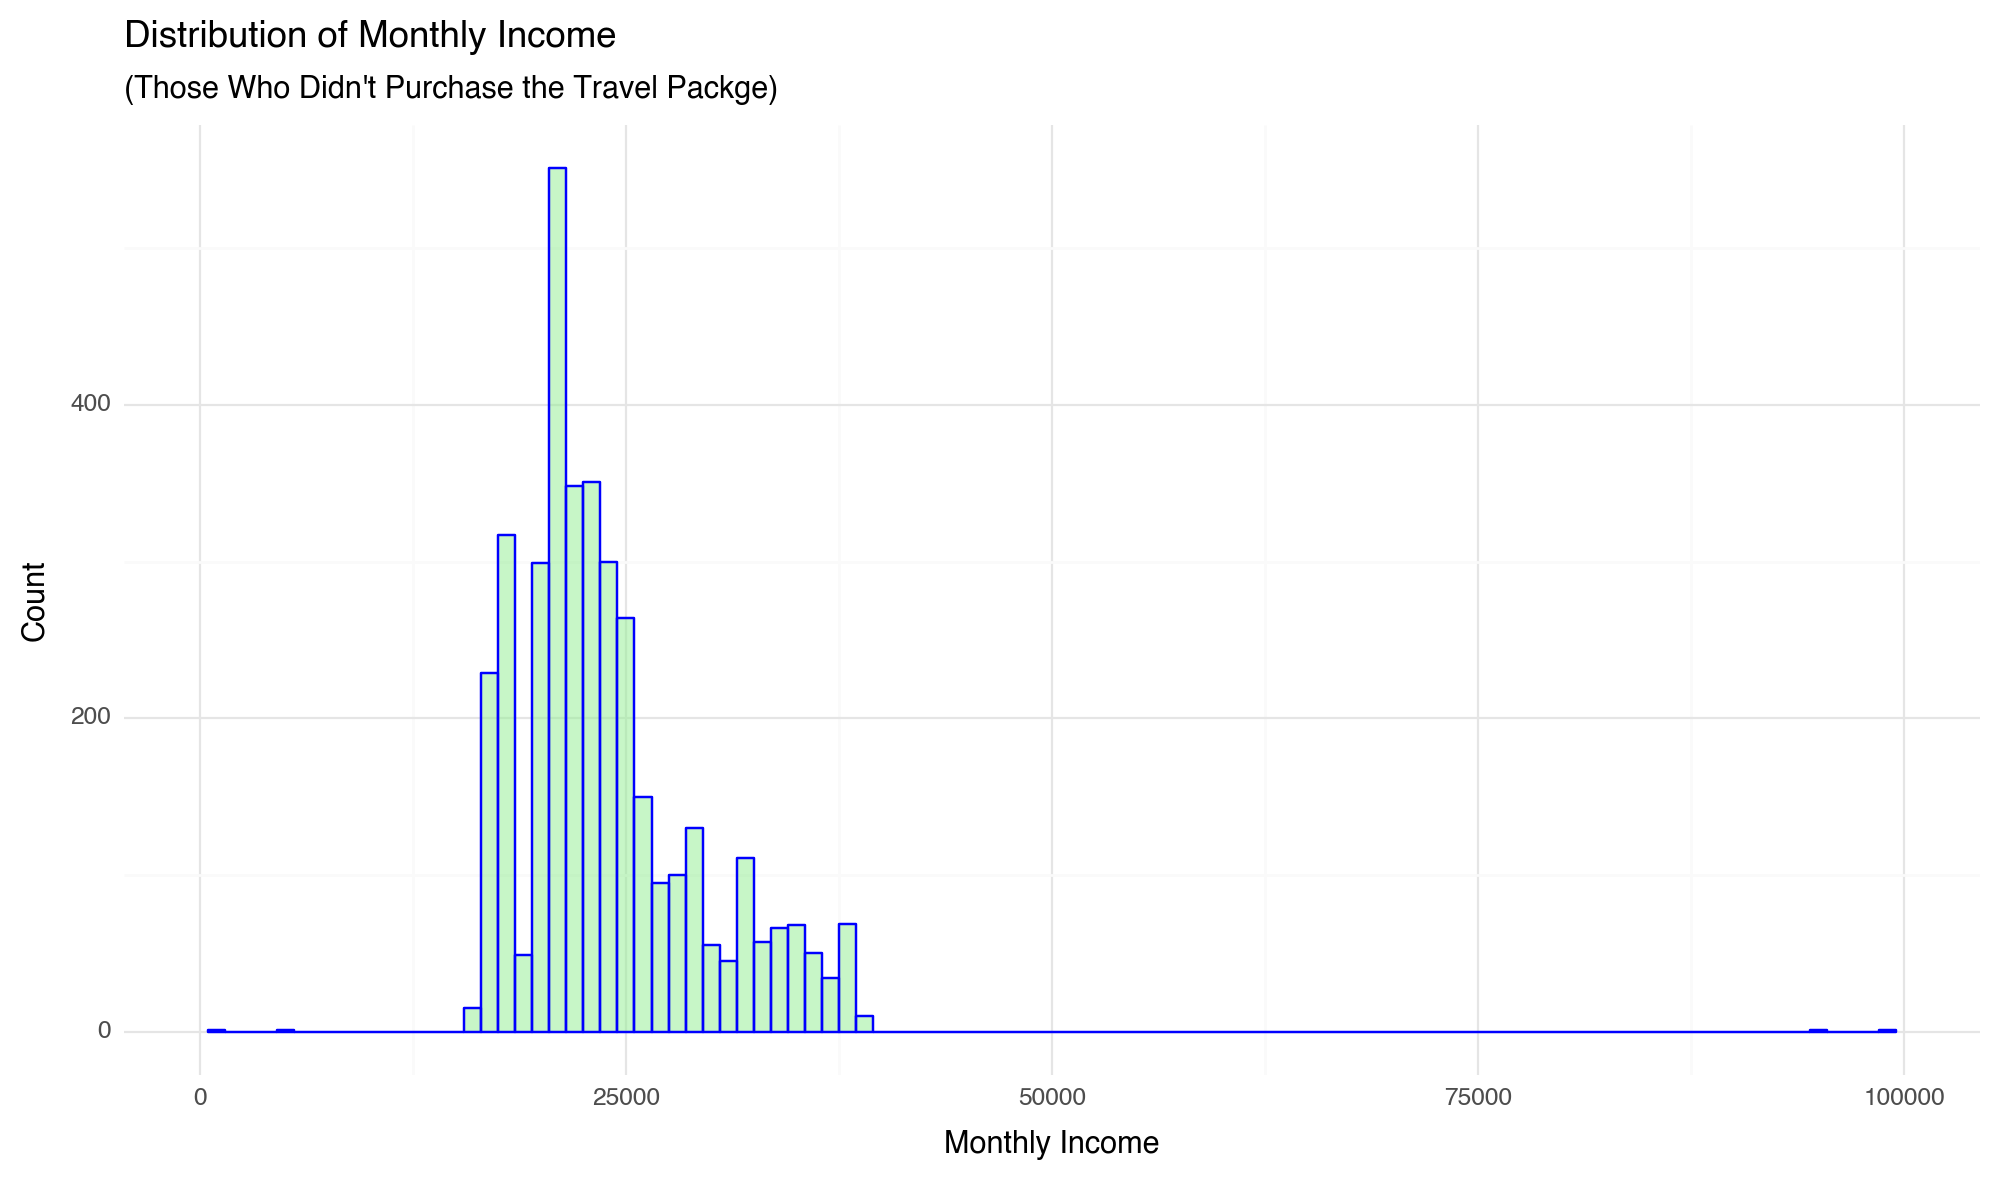

<Figure Size: (1000 x 600)>

In [75]:
#histogram to see monthly income distribution for those who didn't take package
df_no_package = df[df['ProdTaken'] == 0]
hist1 = (ggplot(df_no_package, aes(x = 'MonthlyIncome')) 
+ geom_histogram(binwidth = 1000, fill = 'lightgreen', color = 'blue', alpha = 0.5)
+ labs(x = 'Monthly Income', y = 'Count', title = "Distribution of Monthly Income", 
       subtitle = "(Those Who Didn't Purchase the Travel Packge)")
+ theme_minimal() + theme(figure_size=(10, 6)))
hist1

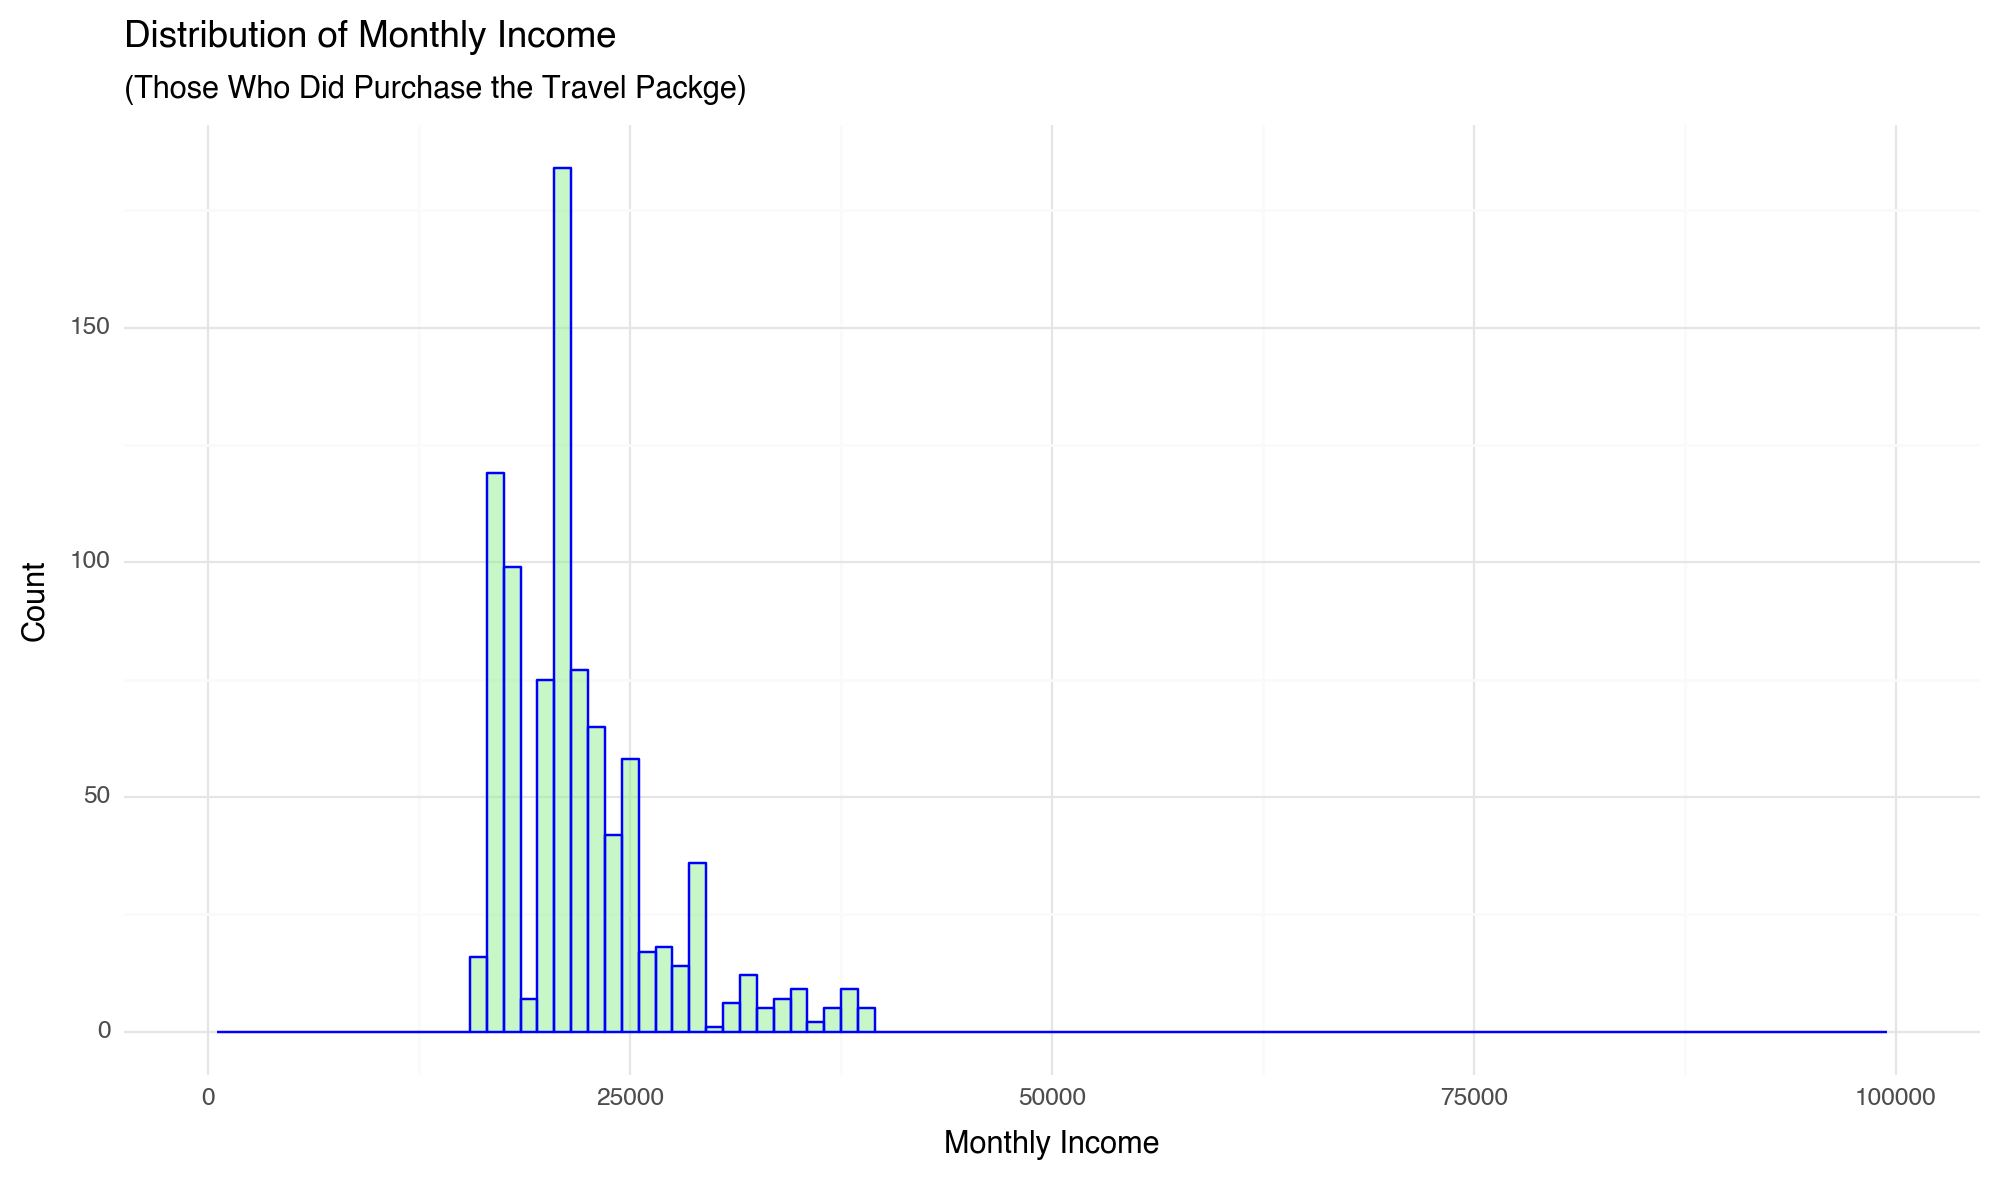

<Figure Size: (1000 x 600)>

In [76]:
#histogram to see monthly income distribution for those who did take package
df_package = df[df['ProdTaken'] == 1]
hist2 = (ggplot(df_package, aes(x = 'MonthlyIncome')) 
+ geom_histogram(binwidth = 1000, fill = 'lightgreen', color = 'blue', alpha = 0.5)
+ labs(x = 'Monthly Income', y = 'Count', title = "Distribution of Monthly Income", 
       subtitle = "(Those Who Did Purchase the Travel Packge)")
+ theme_minimal() + theme(figure_size=(10, 6))
+ scale_x_continuous(limits=(0, 100000)))
hist2

In [73]:
# the histograms are pretty similar although 1st hist seem to be more disributed towards center and have 
# more variation in x (both lower and larger values shown). if statistically significant, this might say something??but what...

In [150]:
#shouldn't do normal regression b/c y is binary = let's do LPM, logit/probit...going to do logit b/c doesn't assume linearity
#ALSO need marginal effects
x_vars = sm.add_constant(df[['MonthlyIncome']])
model = sm.Logit(df['ProdTaken'], x_vars)
result1 = model.fit(cov_type = 'HC1')

Optimization terminated successfully.
         Current function value: 0.481050
         Iterations 5


In [142]:
###DO I EVEN NEED TO INCLUDE THE LOGIT REGRESSION RESULTS? INSTEAD HAVE LOGIT REGRESSION, BUT DON'T SAY PRINT RESULT1.SUMMARY

In [146]:
marginal_effects = result1.get_margeff()
print(marginal_effects.summary())

        Logit Marginal Effects       
Dep. Variable:              ProdTaken
Method:                          dydx
At:                           overall
                   dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
MonthlyIncome -3.779e-06    6.6e-07     -5.730      0.000   -5.07e-06   -2.49e-06


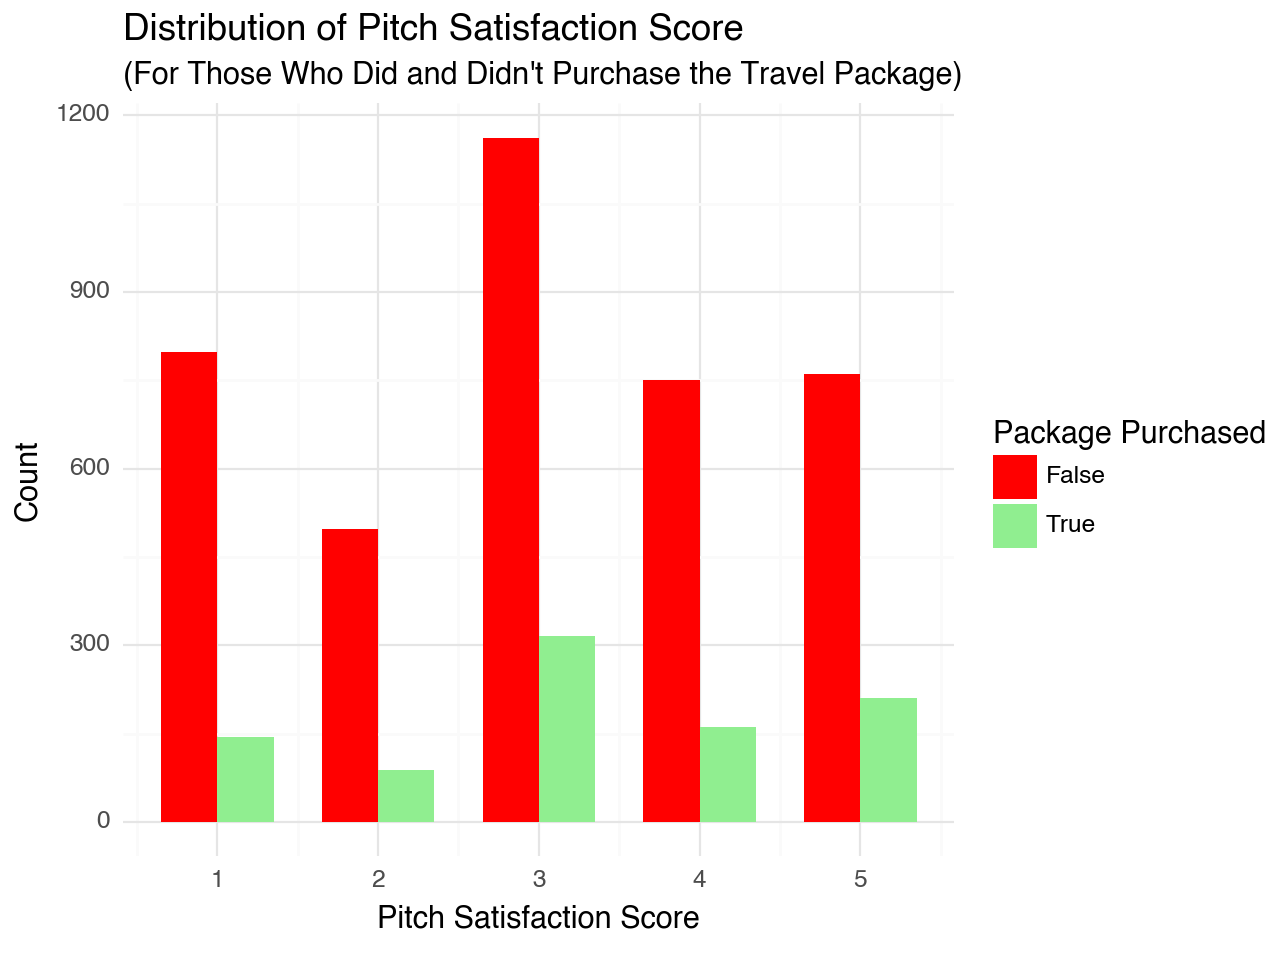

<Figure Size: (640 x 480)>

In [168]:
#pitch satisfaction score
#grouped bar chart, 1 bar = not taken, 1 bar = taken
group_bar1 = (ggplot(df, aes(x='PitchSatisfactionScore', fill= (df['ProdTaken'] ==1)))
+ geom_bar(position='dodge', width=0.7) 
+ scale_fill_manual(values=['red', 'lightgreen']) 
+ labs(x='Pitch Satisfaction Score', y='Count', fill='Package Purchased', title = 'Distribution of Pitch Satisfaction Score',
subtitle = "(For Those Who Did and Didn't Purchase the Travel Package)") 
+ theme_minimal())
group_bar1

In [102]:
df['ProdTaken'].value_counts()
#should be noted that many more people did not take the product, so the above can be confusing
#if statistically significant, i would have expected more who did not take product to be higher in lower numbers and
#those who did take product to be much higher in higher numbers

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [151]:
x_vars = sm.add_constant(df[['MonthlyIncome', 'PitchSatisfactionScore']])
model2 = sm.Logit(df['ProdTaken'], x_vars)
result2 = model2.fit(cov_type = 'HC1')

Optimization terminated successfully.
         Current function value: 0.479683
         Iterations 6


In [145]:
marginal_effects2 = result2.get_margeff()
print(marginal_effects2.summary())

        Logit Marginal Effects       
Dep. Variable:              ProdTaken
Method:                          dydx
At:                           overall
                            dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
MonthlyIncome          -3.795e-06   6.56e-07     -5.785      0.000   -5.08e-06   -2.51e-06
PitchSatisfactionScore     0.0150      0.004      3.701      0.000       0.007       0.023


In [152]:
x_vars = sm.add_constant(df[['MonthlyIncome', 'PitchSatisfactionScore', 'NumberOfFollowups']])
model3 = sm.Logit(df['ProdTaken'], x_vars)
result3 = model3.fit(cov_type = 'HC1')

Optimization terminated successfully.
         Current function value: 0.471604
         Iterations 6


In [153]:
marginal_effects3 = result3.get_margeff()
print(marginal_effects3.summary())
#for each new followup, prob of purchasing product increased by 4.98 percentage points

        Logit Marginal Effects       
Dep. Variable:              ProdTaken
Method:                          dydx
At:                           overall
                            dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
MonthlyIncome          -5.239e-06   6.83e-07     -7.673      0.000   -6.58e-06    -3.9e-06
PitchSatisfactionScore     0.0153      0.004      3.841      0.000       0.008       0.023
NumberOfFollowups          0.0498      0.006      8.025      0.000       0.038       0.062


In [154]:
x_vars = sm.add_constant(df[['MonthlyIncome', 'PitchSatisfactionScore', 'NumberOfFollowups', 'Passport']])
model4 = sm.Logit(df['ProdTaken'], x_vars)
result4 = model4.fit(cov_type = 'HC1')

Optimization terminated successfully.
         Current function value: 0.439540
         Iterations 6


In [170]:
marginal_effects4 = result4.get_margeff()
print(marginal_effects4.summary())
#maybe Passport is one of the largest factors behind why people buy these packages... say someone didn't get theirs in time
#or can't...if you have passport, probability of purchasing package increases by 18.93 percentage points

        Logit Marginal Effects       
Dep. Variable:              ProdTaken
Method:                          dydx
At:                           overall
                            dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
MonthlyIncome           -5.26e-06   6.76e-07     -7.781      0.000   -6.58e-06   -3.93e-06
PitchSatisfactionScore     0.0149      0.004      3.929      0.000       0.007       0.022
NumberOfFollowups          0.0480      0.006      8.131      0.000       0.036       0.060
Passport                   0.1893      0.010     19.356      0.000       0.170       0.208


In [ ]:
#have analyses for each marginal effects table
#maybe show graphs for the other z variables like Passport and NumberOfFollowups (not DurationOfPitch)...in fact can prob get rid of that
### also, should show Brier score, etc. for all of them to see which z variables fits the data best